## Channel Sensitivity

In [4]:
!python analyze_attention.py --cipher-module cipher.present80 --model-path D:\#PROJECT_RKNDIncECA\Related-key-mcp-attention-Inception-based-ND\checkpoints\present80\0x00..80_diff-bit_56\16_pairs_noECA\present80_best_8r.weights.h5 --rounds 8 --pairs 16 --input-diff 0x0400000 --delta-key-bit 56 --samples 100000 --save-npy 

Computed: 0x5579c1387b228445
Expected: 0x5579c1387b228445


2025-12-30 09:33:45.539831: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-30 09:33:46.657938: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-30 09:33:52.336047: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Traceback (most recent call last):
  File "d:\#PROJECT_RKNDIncECA\Related-key-mcp-attention-Inceptio

In [105]:
# !python analyze_attention.py --cipher-module cipher.simmeck3264 --model-path D:\#PROJECT_RKNDIncECA\Related-key-mcp-attention-Inception-based-ND\checkpoints\simeck3264\0x40--delta-key-bit_57\16_pairs\simmeck3264_best_14r.weights.h5 --rounds 14 --pairs 16 --input-diff 0x40 --delta-key-bit 57 --samples 100000 --save-npy

In [106]:
# !python analyze_attention.py --cipher-module cipher.simmeck3264 --model-path D:\#PROJECT_RKNDIncECA\Related-key-mcp-attention-Inception-based-ND\checkpoints\simeck3264\0x40--delta-key-bit_57\16_pairs\simmeck3264_best_15r.weights.h5 --rounds 15 --pairs 16 --input-diff 0x40 --delta-key-bit 57 --samples 100000 --save-npy

In [107]:
# !python analyze_attention.py --cipher-module cipher.present80 --model-path D:\#PROJECT_RKNDIncECA\Related-key-mcp-attention-Inception-based-ND\checkpoints\present80\0x00..80_diff-bit_56\16_pairs\present80_best_9r.weights.h5 --rounds 9 --pairs 16 --input-diff 0x80 --delta-key-bit 56 --samples 100000 --save-npy

### Setup & Load Data

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

PATH = "attention_analysis\simmeck3264\simmeck3264_best_15r.weights_r15_p16.npz"

data = np.load(PATH)

att = data["att"]     # shape = (N, C)
y   = data["y"]       # shape = (N,)
mu_real = data["mu_real"]
mu_rand = data["mu_rand"]
delta = data["delta"]

att.shape, y.shape


((100000, 128), (100000,))

### Split real vs random

In [109]:
att_real = att[y == 1]
att_rand = att[y == 0]

att_real.shape, att_rand.shape


((50000, 128), (50000, 128))

### Compute Attention Entropy

In [110]:
def attention_entropy(mat):
    eps = 1e-9
    return -(mat * np.log(mat + eps)).sum(axis=1)

H_real = attention_entropy(att_real)
H_rand = attention_entropy(att_rand)

H_real.mean(), H_rand.mean()


(14.670933, 14.67197)

### Plot entropy distribution

C:\Users\hthan\AppData\Local\Temp\ipykernel_20164\2960982305.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(H_real, label="Real", shade=True)
C:\Users\hthan\AppData\Local\Temp\ipykernel_20164\2960982305.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(H_rand, label="Random", shade=True)


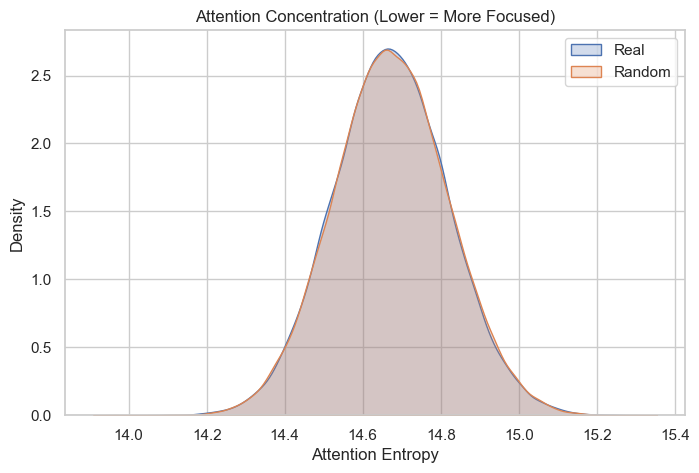

In [111]:
plt.figure(figsize=(8,5))
sns.kdeplot(H_real, label="Real", shade=True)
sns.kdeplot(H_rand, label="Random", shade=True)
plt.xlabel("Attention Entropy")
plt.ylabel("Density")
plt.title("Attention Concentration (Lower = More Focused)")
plt.legend()
plt.show()


### Per-channel mean attention profile

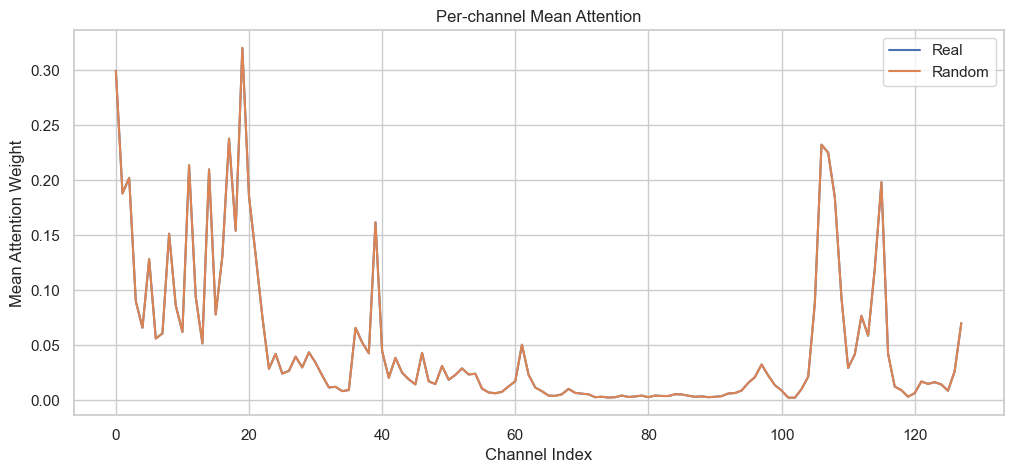

In [112]:
plt.figure(figsize=(12,5))
plt.plot(mu_real, label="Real")
plt.plot(mu_rand, label="Random")
plt.title("Per-channel Mean Attention")
plt.xlabel("Channel Index")
plt.ylabel("Mean Attention Weight")
plt.legend()
plt.show()


### Δ attention per channel

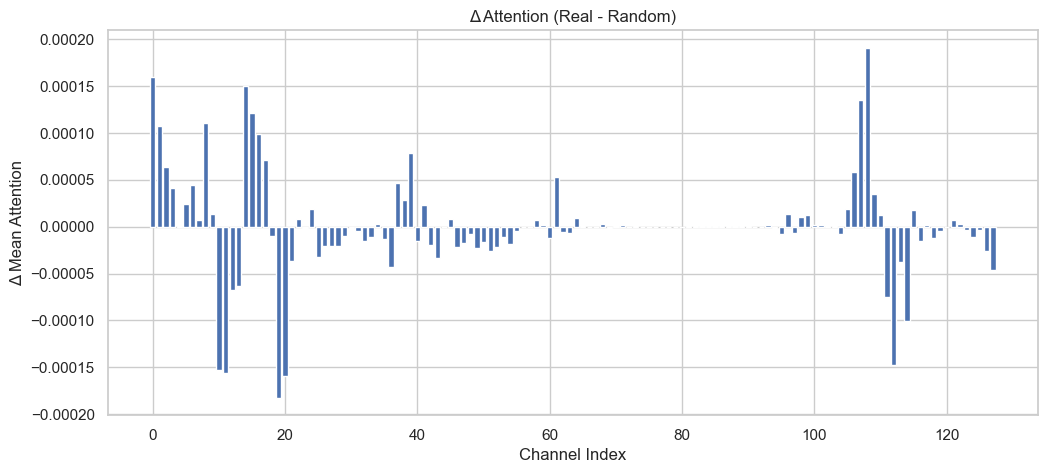

In [113]:
plt.figure(figsize=(12,5))
plt.bar(range(len(delta)), delta)
plt.title("Δ Attention (Real - Random)")
plt.xlabel("Channel Index")
plt.ylabel("Δ Mean Attention")
plt.show()


### Attention heatmap (REAL)

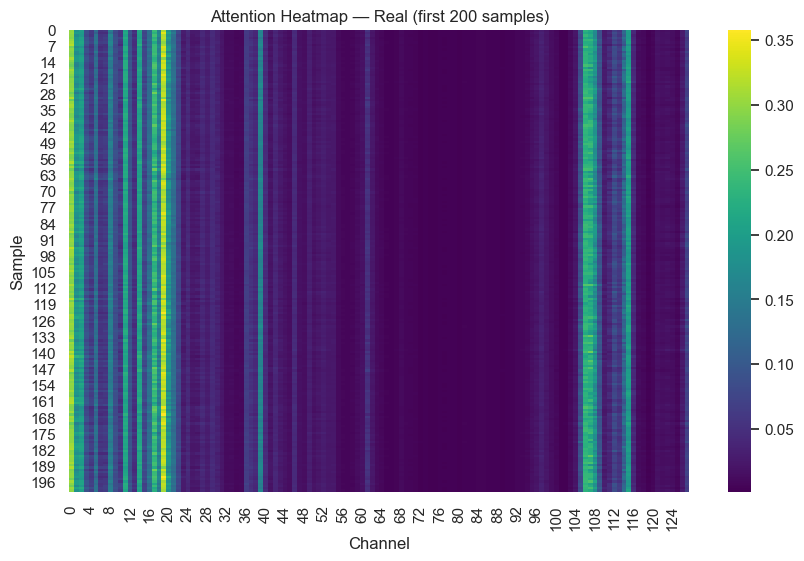

In [114]:
plt.figure(figsize=(10,6))
sns.heatmap(att_real[:200], cmap="viridis", cbar=True)
plt.title("Attention Heatmap — Real (first 200 samples)")
plt.xlabel("Channel")
plt.ylabel("Sample")
plt.show()


### Attention heatmap (RANDOM)

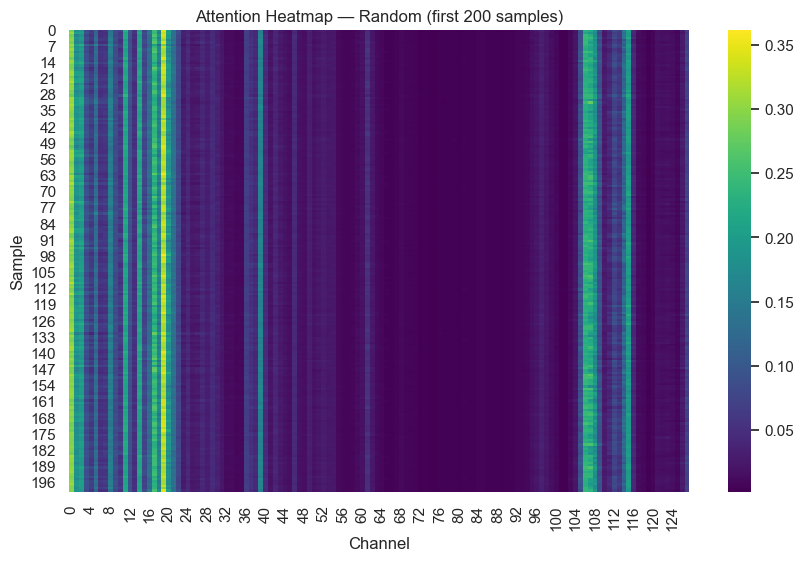

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(att_rand[:200], cmap="viridis", cbar=True)
plt.title("Attention Heatmap — Random (first 200 samples)")
plt.xlabel("Channel")
plt.ylabel("Sample")
plt.show()


## Multi-Pair vs Single-Pair ECA Behavior